In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
#  and normalize it with range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


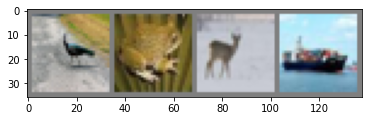

 bird  frog  deer  ship


In [6]:
# show some training images
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network that take 3-channel images data
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 input image channel, 6 output channels, 5x5 square convolution
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling over a (2, 2) window
        self.conv2 = nn.Conv2d(6, 16, 5) # 6 input image channel, 16 output channels, 5x5 square convolution
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #Define pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5) # 5*5 from image dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
import torch.optim as optim

# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
# Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # backward
        loss.backward()
        # optimize
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.156
[1,  4000] loss: 1.828
[1,  6000] loss: 1.659
[1,  8000] loss: 1.562
[1, 10000] loss: 1.489
[1, 12000] loss: 1.466
[2,  2000] loss: 1.377
[2,  4000] loss: 1.348
[2,  6000] loss: 1.319
[2,  8000] loss: 1.325
[2, 10000] loss: 1.276
[2, 12000] loss: 1.254
Finished Training


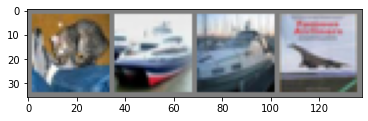

GroundTruth:    cat  ship  ship plane


In [10]:
# get data iterator
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
# get output images
outputs = net(images)

In [12]:
# get predicted image
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car plane plane


In [13]:
correct = 0
total = 0

# get accuracy for all the test images
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # get test images
        outputs = net(images)
        # get predicted images
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        # calculate the accuracy
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [14]:
# get accuracies of all the classes
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # get test images
        outputs = net(images)
        # get predicted images
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        # get predicted information
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# calculate the accuracies of all the classes
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 67 %
Accuracy of   car : 57 %
Accuracy of  bird : 29 %
Accuracy of   cat : 35 %
Accuracy of  deer : 42 %
Accuracy of   dog : 42 %
Accuracy of  frog : 76 %
Accuracy of horse : 60 %
Accuracy of  ship : 53 %
Accuracy of truck : 78 %
